**El objetivo principal del análisis de Machine Learning en el dataset de "Bone Marrow Transplant: Children" es desarrollar un modelo predictivo que anticipe la supervivencia de los niños que han recibido un trasplante de médula ósea.**

**Se desarrollará un modelo de regresión que permita predecir el tiempo de supervivencia (en días) de un paciente que ha recibido un trasplante de médula ósea. La variable objetivo sería "survival_time", que indica el tiempo que un paciente ha sobrevivido después del trasplante.**

**Instalación de la librería ucimlrepo**

In [ ]:
#Instalación de la librería ucimlrepo
%pip install ucimlrepo
%pip install matplotlib seaborn

In [ ]:
# Cargando las librerías
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yaml

**Descargamos el conjunto de datos desde el repositorio UCI. Se accede a las características (X) y etiquetas (y) del conjunto de datos como dataframes de pandas.**

In [ ]:
#Importamos la función fetch_ucirepo del paquete ucimlrepo, para descargar el conjuntos de datos del repositorio UCI.
from ucimlrepo import fetch_ucirepo

# Descargamos el conjunto de datos, con identificador 565 en el repositorio de UCI.
bmtch = fetch_ucirepo(id=565)

# Acceso a los datos (como pandas dataframes)
X = bmtch.data.features
y = bmtch.data.targets

In [ ]:
X.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,aGvHDIIIIV,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time
0,1,1,22.830137,0,1,0,1,1.0,1.0,0.0,...,0,1.0,7.20,1.338760,5.38,35.0,19,51,32,999
1,1,0,23.342466,0,1,0,-1,-1.0,1.0,0.0,...,1,1.0,4.50,11.078295,0.41,20.6,16,37,1000000,163
2,1,0,26.394521,0,1,0,-1,-1.0,1.0,0.0,...,1,1.0,7.94,19.013230,0.42,23.4,23,20,1000000,435
3,0,0,39.684932,1,1,0,1,2.0,1.0,1.0,...,0,NaN,4.25,29.481647,0.14,50.0,23,29,19,53
4,0,1,33.358904,0,0,0,1,2.0,0.0,1.0,...,1,1.0,51.85,3.972255,13.05,9.0,14,14,1000000,2043


In [ ]:
y.head()

,survival_status
0,0
1,1
2,1
3,1
4,0


In [ ]:
# Revisamos la metadata
print(bmtch.metadata)

{'uci_id': 565, 'name': 'Bone marrow transplant: children', 'repository_url': 'https://archive.ics.uci.edu/dataset/565/bone+marrow+transplant+children', 'data_url': 'https://archive.ics.uci.edu/static/public/565/data.csv', 'abstract': 'The data set describes pediatric patients with several hematologic diseases, who were subject to the unmanipulated allogeneic unrelated donor hematopoietic stem cell transplantation.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 187, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Gender', 'Age'], 'target_col': ['survival_status'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5NP6Z', 'creators': ['Marek Sikora', 'Łukasz Wróbel', 'Adam Gudyś'], 'intro_paper': {'ID': 293, 'type': 'NATIVE', 'title': 'GuideR: a guided se

In [ ]:
# Revisamos la information de las variables
print(bmtch.variables)

                    name     role         type demographic  \
0        Recipientgender  Feature       Binary      Gender   
1         Stemcellsource  Feature       Binary        None   
2               Donorage  Feature      Integer         Age   
3             Donorage35  Feature       Binary         Age   
4                   IIIV  Feature       Binary        None   
5            Gendermatch  Feature       Binary      Gender   
6               DonorABO  Feature  Categorical        None   
7           RecipientABO  Feature  Categorical        None   
8            RecipientRh  Feature       Binary        None   
9               ABOmatch  Feature       Binary        None   
10             CMVstatus  Feature  Categorical        None   
11              DonorCMV  Feature       Binary        None   
12          RecipientCMV  Feature       Binary        None   
13               Disease  Feature  Categorical        None   
14             Riskgroup  Feature       Binary        None   
15      

In [ ]:
# Concatenamos ambos datasets (feature y target)
bmtch_df = pd.concat([X, y], axis = 1)
bmtch_df.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1,1.0,1.0,0.0,...,1.0,7.20,1.338760,5.38,35.0,19,51,32,999,0
1,1,0,23.342466,0,1,0,-1,-1.0,1.0,0.0,...,1.0,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
2,1,0,26.394521,0,1,0,-1,-1.0,1.0,0.0,...,1.0,7.94,19.013230,0.42,23.4,23,20,1000000,435,1
3,0,0,39.684932,1,1,0,1,2.0,1.0,1.0,...,NaN,4.25,29.481647,0.14,50.0,23,29,19,53,1
4,0,1,33.358904,0,0,0,1,2.0,0.0,1.0,...,1.0,51.85,3.972255,13.05,9.0,14,14,1000000,2043,0


# **Estadísticas Descriptivas**

In [ ]:
# Inspeccionamos rápidamente los datos
bmtch_df.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1,1.0,1.0,0.0,...,1.0,7.20,1.338760,5.38,35.0,19,51,32,999,0
1,1,0,23.342466,0,1,0,-1,-1.0,1.0,0.0,...,1.0,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
2,1,0,26.394521,0,1,0,-1,-1.0,1.0,0.0,...,1.0,7.94,19.013230,0.42,23.4,23,20,1000000,435,1
3,0,0,39.684932,1,1,0,1,2.0,1.0,1.0,...,NaN,4.25,29.481647,0.14,50.0,23,29,19,53,1
4,0,1,33.358904,0,0,0,1,2.0,0.0,1.0,...,1.0,51.85,3.972255,13.05,9.0,14,14,1000000,2043,0


In [ ]:
# Tamaño del DataFrame
print(bmtch_df.shape)

(187, 37)


In [ ]:
# Resumen informativo del DataFrame
bmtch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recipientgender       187 non-null    int64  
 1   Stemcellsource        187 non-null    int64  
 2   Donorage              187 non-null    float64
 3   Donorage35            187 non-null    int64  
 4   IIIV                  187 non-null    int64  
 5   Gendermatch           187 non-null    int64  
 6   DonorABO              187 non-null    int64  
 7   RecipientABO          186 non-null    float64
 8   RecipientRh           185 non-null    float64
 9   ABOmatch              186 non-null    float64
 10  CMVstatus             171 non-null    float64
 11  DonorCMV              185 non-null    float64
 12  RecipientCMV          173 non-null    float64
 13  Disease               187 non-null    object 
 14  Riskgroup             187 non-null    int64  
 15  Txpostrelapse         1

**Copia del DF**

In [ ]:
# Creamos una copia del DataFrame original para trabajar sin modificar el original
bmtch_df_copy = bmtch_df.copy()

# **Valores Faltantes**

In [ ]:
# Calculamos el número de datos faltantes (NaN) en cada columna del DataFrame completo
missing_values = bmtch_df_copy.isnull().sum()

# Filtramos e imprimimos solo las columnas con datos faltantes
for col, value in missing_values.items():
    if value > 0:
        print(f'Variable: {col}, Datos faltantes: {value}')

Variable: RecipientABO, Datos faltantes: 1
Variable: RecipientRh, Datos faltantes: 2
Variable: ABOmatch, Datos faltantes: 1
Variable: CMVstatus, Datos faltantes: 16
Variable: DonorCMV, Datos faltantes: 2
Variable: RecipientCMV, Datos faltantes: 14
Variable: Antigen, Datos faltantes: 1
Variable: Allele, Datos faltantes: 1
Variable: extcGvHD, Datos faltantes: 31
Variable: CD3dCD34, Datos faltantes: 5
Variable: CD3dkgx10d8, Datos faltantes: 5
Variable: Rbodymass, Datos faltantes: 2


**Inputamos de acuerdo a contexto**

In [ ]:
# Lista de columnas para imputar con la moda
columnas_moda = ['RecipientABO', 'RecipientRh', 'ABOmatch', 'CMVstatus', 'DonorCMV', 'RecipientCMV',
                 'Antigen', 'Allele', 'extcGvHD']

# Lista de columnas para imputar con la mediana
columnas_mediana = ['CD3dCD34', 'CD3dkgx10d8', 'Rbodymass']

# Función para imputar valores
def imputar_valores(bmtch_df_copy):
    # Imputar con la moda para columnas categóricas
    for col in columnas_moda:
        bmtch_df_copy[col].fillna(bmtch_df_copy[col].mode()[0], inplace=True)

    # Imputar con la mediana para columnas numéricas
    for col in columnas_mediana:
        bmtch_df_copy[col].fillna(bmtch_df_copy[col].median(), inplace=True)

    return bmtch_df_copy

# Ejecutar la función
bmtch_df_copy = imputar_valores(bmtch_df_copy)

# **Valores Erroneos**

Detectamos y eliminar valores erróneos de acuerdo a reglas asociadas al contexto y conocimiento del dominio.

En el caso de la variable time_to_aGvHD_III_IV, se imputa con la mediana debido a que existen 145 datos erroneos de un total de 187, además se utiliza la mediana en lugar de la media por el sesgo de de los datos de dicha variable.

In [ ]:
# Diccionario de reglas para detectar valores erróneos
error_rules = {
    'Recipientgender': lambda x: x in [0, 1],  # 0: Femenino, 1: Masculino
    'Stemcellsource': lambda x: x in [0, 1],  # 0: Sangre periférica, 1: Médula ósea
    'Donorage': lambda x:  (0 <= x <= 120),  # Edad del donante fuera del rango
    'Donorage35': lambda x: x in [0, 1],  # Edad del donante fuera del rango
    'IIIV': lambda x: x in [0, 1],  # Clasificación del trasplante entre I y IV
    'Gendermatch': lambda x: x in [0, 1],  # 0: No compatible, 1: Compatible
    'DonorABO': lambda x: x in [-1, 0, 1, 2],  # -1: B, 0: O, 1: A, 2: AB
    'RecipientABO': lambda x: x in [-1, 0, 1, 2],  # -1: B, 0: O, 1: A, 2: AB
    'RecipientRh': lambda x: x in [0, 1],  # 0: Rh-, 1: Rh+
    'ABOmatch': lambda x: x in [0, 1],  # 0: Mismatched, 1: Matched
    'CMVstatus': lambda x: x in [0, 1, 2, 3],  # Presencia/ausencia de CMV y otros estados
    'DonorCMV': lambda x: x in [0, 1],  # 0: Negativo, 1: Positivo
    'RecipientCMV': lambda x: x in [0, 1],  # 0: Negativo, 1: Positivo
    'Disease': lambda x: x in ['ALL', 'AML', 'chronic', 'nonmalignant', 'lymphoma'],  # Tipos de enfermedad
    'Riskgroup': lambda x: x in [0, 1],  # 0: Bajo, 1: Alto
    'Txpostrelapse': lambda x: x in [0, 1],  # 0: No, 1: Sí (trasplante tras recaída)
    'Diseasegroup': lambda x: x in [0, 1],  # 0: No maligna, 1: Maligna
    'HLAmatch': lambda x: x in [0, 1, 2, 3],  # Compatibilidad HLA 7/10 a 10/10
    'HLAmismatch': lambda x: x in [0, 1],  # 0: Compatible, 1: No compatible
    'Antigen': lambda x: x  in [-1, 0, 1, 2],  # Diferencia de antígenos entre donante y receptor
    'Allele': lambda x: x  in [-1, 0, 1, 2, 3],  # Diferencia de alelos entre donante y receptor
    'HLAgrI': lambda x:  (0 <= x <= 5),  # Grado de diferencia HLA (fuera de rango)
    'Recipientage': lambda x:  (0 <= x <= 120),  # Edad del receptor fuera de rango
    'Recipientage10': lambda x: x in [0, 1],  # 0: >= 10 años, 1: < 10 años
    'Recipientageint': lambda x: x in [0, 1, 2],  # Edad del receptor discretizada en intervalos
    'Relapse': lambda x: x in [0, 1],  # 0: No, 1: Sí (recaída)
    'aGvHDIIIIV': lambda x: x in [0, 1, 2, 3],  # Grado de GvHD aguda entre 0 y IV
    'extcGvHD': lambda x: x in [0, 1],  # 0: No, 1: Sí (GvHD crónica extensa)
    'CD34kgx10d6': lambda x:  (0 <= x <= 60),  # Dosis de CD34+ fuera de rango
    'CD3dCD34': lambda x:  (0 <= x <= 100),  # Relación CD3/CD34 fuera de rango
    'CD3dkgx10d8': lambda x:  (0 <= x <= 21),  # Dosis de CD3+ fuera de rango
    'Rbodymass': lambda x:  (6 <= x <= 104),  # Masa corporal del receptor fuera de rango
    'ANCrecovery': lambda x:  (7 <= x <= 30),  # Tiempo de recuperación de neutrófilos fuera de rango
    'PLTrecovery': lambda x:  (0 <= x <= 365),  # Tiempo de recuperación de plaquetas fuera de rango
    'time_to_aGvHD_III_IV': lambda x:  (0 <= x <= 365),  # Tiempo en días hasta GvHD aguda
    'survival_time': lambda x:  (0 <= x <= 4000),  # Tiempo de supervivencia fuera de rango
    'survival_status': lambda x: x in [0, 1],  # 0: Vivo, 1: Fallecido
}

# Función para detectar valores erróneos
def detect_errors(df, column, rule):
    # Filtrar los valores que NO cumplen la regla definida
    return df[~df[column].apply(rule)]  # Usamos ~ para invertir la lógica

# Detectar y contar los valores erróneos en las columnas seleccionadas
for col, rule in error_rules.items():
    errors = detect_errors(bmtch_df_copy, col, rule)
    num_errors = len(errors)
    if num_errors > 0:
        print(f'Variable: {col}, Valores erróneos detectados: {num_errors}')

Variable: HLAgrI, Valores erróneos detectados: 5
Variable: ANCrecovery, Valores erróneos detectados: 5
Variable: PLTrecovery, Valores erróneos detectados: 17
Variable: time_to_aGvHD_III_IV, Valores erróneos detectados: 145


**Eliminamos e Imputamos**

In [ ]:
# Función para eliminar los valores erróneos e imputar 'time_to_aGvHD_III_IV'
def eliminar_e_imputar(df, error_rules):
    bmtch_df_clean = bmtch_df_copy.copy()  # Copiamos el DataFrame original

    # Lista para almacenar los índices de las filas con errores (excepto para time_to_aGvHD_III_IV)
    indices_a_eliminar = []

    # Iterar sobre las reglas de error excepto 'time_to_aGvHD_III_IV'
    for col, rule in error_rules.items():
        if col != 'time_to_aGvHD_III_IV':  # Excluir esta variable de eliminación
            errores = detect_errors(bmtch_df_clean, col, rule)
            if len(errores) > 0:
                print(f"Variable: {col}, Valores erróneos detectados: {len(errores)}")
                # Agregar los índices de los errores
                indices_a_eliminar.extend(errores.index.tolist())

    # Eliminar los índices de las filas erróneas
    bmtch_df_clean.drop(index=set(indices_a_eliminar), inplace=True)

    # Imputar la variable 'time_to_aGvHD_III_IV' con la mediana
    mediana_aGvHD = bmtch_df_clean.loc[bmtch_df_clean['time_to_aGvHD_III_IV'] != 1000000, 'time_to_aGvHD_III_IV'].median()
    bmtch_df_clean['time_to_aGvHD_III_IV'] = bmtch_df_clean['time_to_aGvHD_III_IV'].replace(1000000, mediana_aGvHD)

    return bmtch_df_clean

In [ ]:
# Ejecutar la función para eliminar valores erróneos e imputar 'time_to_aGvHD_III_IV'
bmtch_df_clean = eliminar_e_imputar(bmtch_df_copy, error_rules)

Variable: HLAgrI, Valores erróneos detectados: 5
Variable: ANCrecovery, Valores erróneos detectados: 5
Variable: PLTrecovery, Valores erróneos detectados: 17


**Filas Resultantes**

In [ ]:
# Verificar el número de filas antes y después
filas_antes = bmtch_df_copy.shape[0]
filas_despues = bmtch_df_clean.shape[0]

print(f"Número de filas antes de la eliminación: {filas_antes}")
print(f"Número de filas después de la eliminación: {filas_despues}")

Número de filas antes de la eliminación: 187
Número de filas después de la eliminación: 166


# **Variables Númericas**

In [ ]:
# Lista de variables numéricas seleccionadas
selected_columns = ['Donorage', 'Recipientage', 'Rbodymass', 'CD34kgx10d6', 'CD3dkgx10d8',
     'CD3dCD34', 'ANCrecovery', 'PLTrecovery', 'time_to_aGvHD_III_IV', 'survival_time']

# Aplicar describe() solo a las variables numéricas en la lista
bmtch_df_clean[selected_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Donorage,166.0,33.790015,8.135412,18.646575,27.854110,33.717809,40.296575,55.553425
Recipientage,166.0,9.796988,5.162703,0.600000,5.100000,9.550000,13.900000,20.200000
Rbodymass,166.0,35.221687,18.817008,6.000000,19.500000,33.000000,49.450000,97.800000
CD34kgx10d6,166.0,12.260801,9.934708,0.790000,5.822500,9.835000,15.877500,57.780000
CD3dkgx10d8,166.0,4.846295,3.869734,0.040000,1.850000,4.357500,6.582500,20.020000
CD3dCD34,166.0,5.398099,9.965775,0.204132,1.798941,2.734365,5.560163,99.560970
ANCrecovery,166.0,15.192771,2.939626,9.000000,13.000000,15.000000,17.000000,26.000000
PLTrecovery,166.0,31.873494,37.322862,9.000000,15.250000,21.000000,29.750000,285.000000
time_to_aGvHD_III_IV,166.0,23.349398,12.246888,10.000000,21.000000,21.000000,21.000000,100.000000
survival_time,166.0,1028.819277,842.506119,19.000000,294.000000,836.500000,1687.250000,3364.000000


# **Graficas**

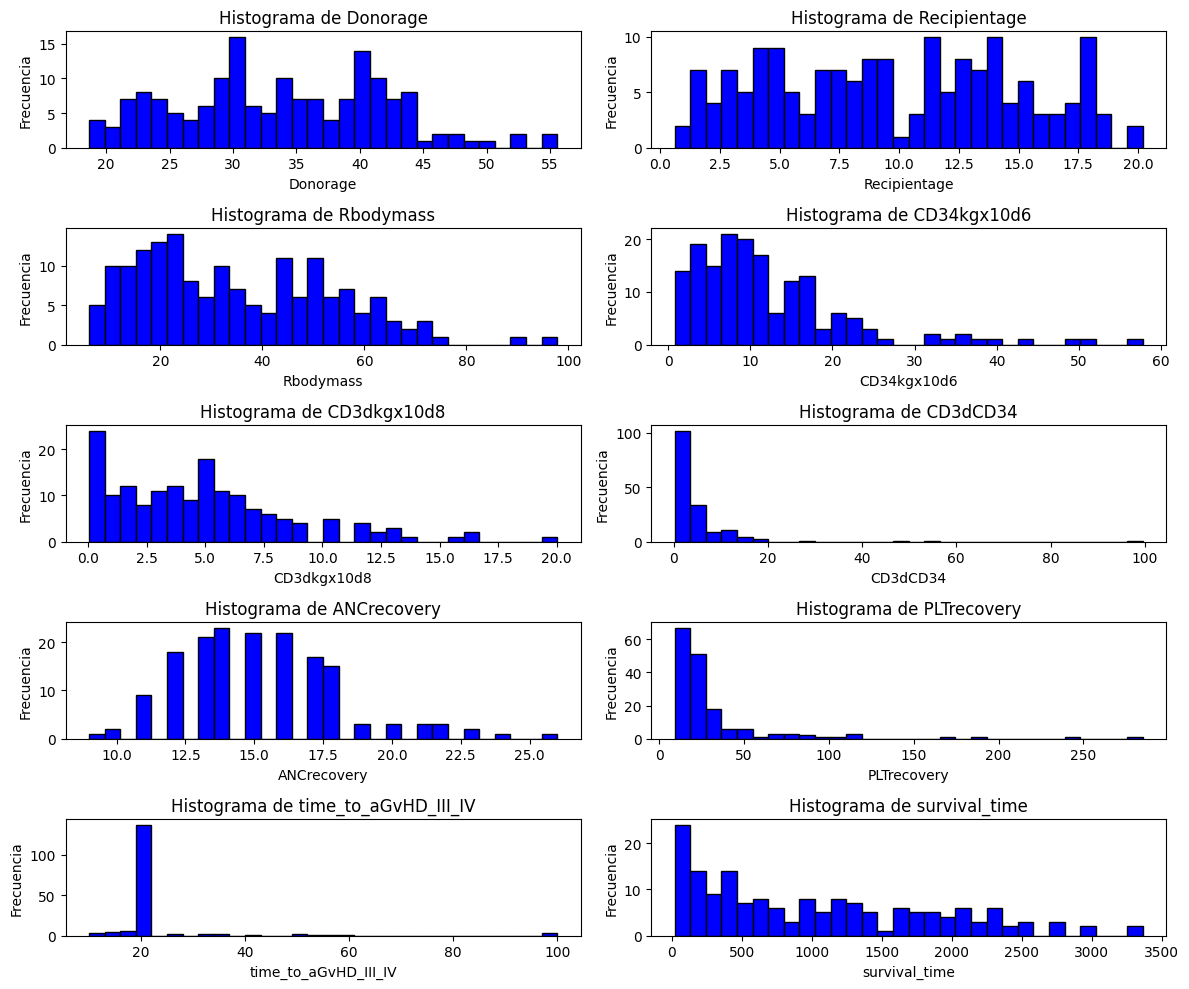

In [ ]:
# Lista de columnas que fueron transformadas
selected_columns = ['Donorage', 'Recipientage', 'Rbodymass', 'CD34kgx10d6', 'CD3dkgx10d8',
                    'CD3dCD34', 'ANCrecovery', 'PLTrecovery', 'time_to_aGvHD_III_IV', 'survival_time']

# Crear histogramas para cada columna
plt.figure(figsize=(12, 10))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(5, 2, i)  # Crear subplots (5 filas, 2 columnas para cada variable)
    plt.hist(bmtch_df_clean[col], bins=30, color='blue', edgecolor='black')  # Histograma de la columna
    plt.title(f'Histograma de {col}')  # Título del gráfico
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()  # Ajustar la disposición
plt.show()  # Mostrar el gráfico

In [ ]:
# Lista de columnas a las que se les aplicará la transformación logarítmica
log_columns = ['Rbodymass', 'CD34kgx10d6', 'CD3dkgx10d8', 'CD3dCD34', 'ANCrecovery', 'PLTrecovery']

# Aplicar la transformación logarítmica
for col in log_columns:
    bmtch_df_clean[col] = np.log1p(bmtch_df_clean[col])  # log1p(x) = log(1 + x) para evitar log(0)

# Lista de columnas a las que se les aplicará la transformación de raíz cuadrada
sqrt_columns = ['time_to_aGvHD_III_IV', 'survival_time']

# Aplicar la transformación de raíz cuadrada
for col in sqrt_columns:
    bmtch_df_clean[f'sqrt_{col}'] = np.sqrt(bmtch_df_clean[col])

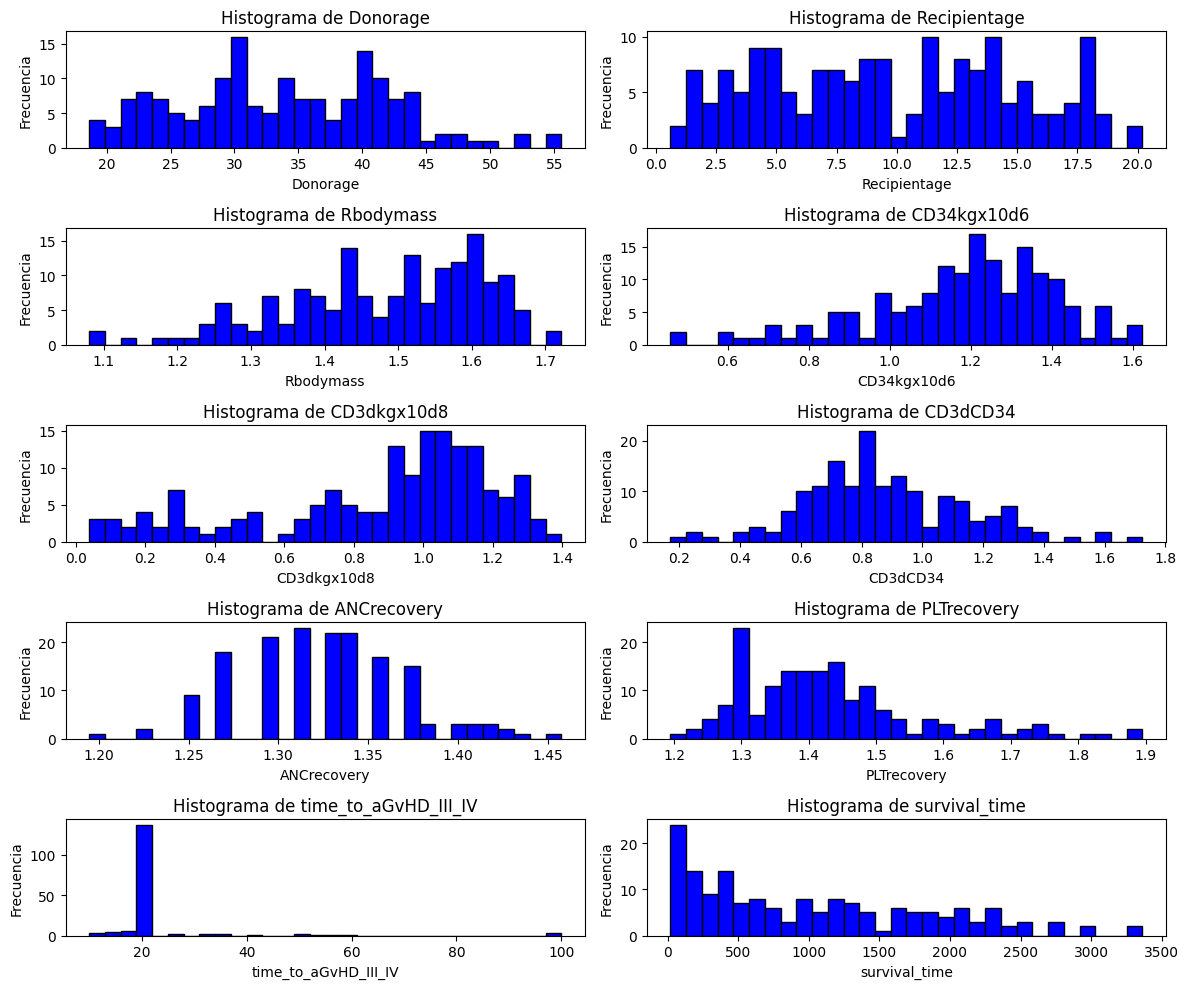

In [ ]:
# Lista de columnas que fueron transformadas
selected_columns = ['Donorage', 'Recipientage', 'Rbodymass', 'CD34kgx10d6', 'CD3dkgx10d8',
                    'CD3dCD34', 'ANCrecovery', 'PLTrecovery', 'time_to_aGvHD_III_IV', 'survival_time']

# Crear histogramas para cada columna
plt.figure(figsize=(12, 10))  # Tamaño de la figura general

for i, col in enumerate(selected_columns, 1):
    plt.subplot(5, 2, i)  # Crear subplots (5 filas, 2 columnas para cada variable)
    plt.hist(bmtch_df_clean[col], bins=30, color='blue', edgecolor='black')  # Histograma de la columna
    plt.title(f'Histograma de {col}')  # Título del gráfico
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()  # Ajustar la disposición
plt.show()  # Mostrar el gráfico

# **Outliers**

<Figure size 1500x1500 with 0 Axes>

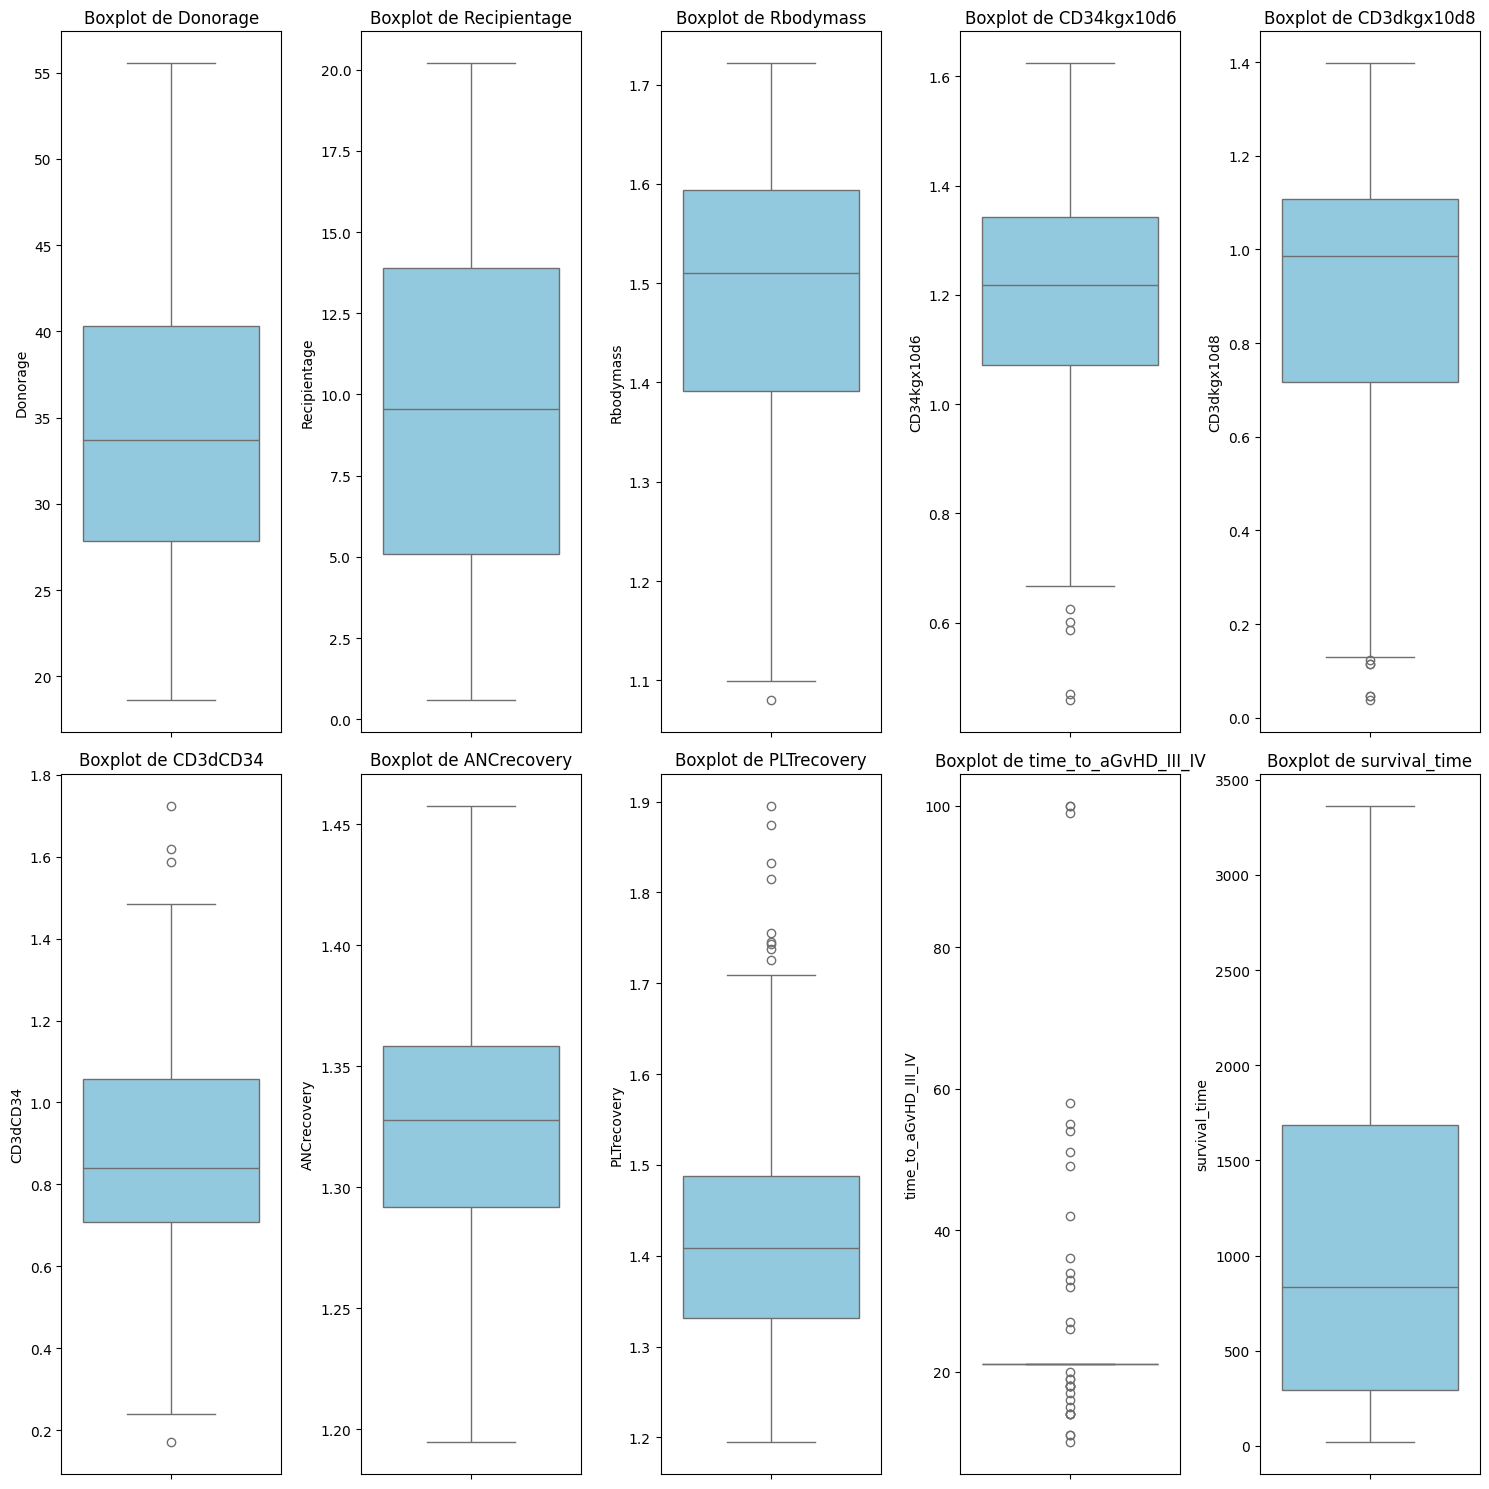

In [ ]:
# Lista de las columnas numéricas seleccionadas
selected_columns = ['Donorage', 'Recipientage', 'Rbodymass', 'CD34kgx10d6', 'CD3dkgx10d8',
     'CD3dCD34', 'ANCrecovery', 'PLTrecovery', 'time_to_aGvHD_III_IV', 'survival_time']

# Definimos el tamaño de la figura
plt.figure(figsize=(15, 15))

# Definimos la cantidad de columnas y filas para los subplots
n_cols = 5  # Número de columnas en la matriz
n_rows = (len(selected_columns) + n_cols - 1) // n_cols  # Calculamos filas necesarias

# Creamos subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Generamos los boxplots para cada variable numérica seleccionada
for i, col in enumerate(selected_columns):
    row = i // n_cols  # Fila del subplot
    col_num = i % n_cols  # Columna del subplot
    sns.boxplot(data=bmtch_df_clean, y=col, ax=axes[row, col_num], color="skyblue")
    axes[row, col_num].set_title(f'Boxplot de {col}')

# Eliminamos subplots vacíos si hay
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Ajustamos el espaciado entre los subplots
plt.tight_layout()
plt.show()


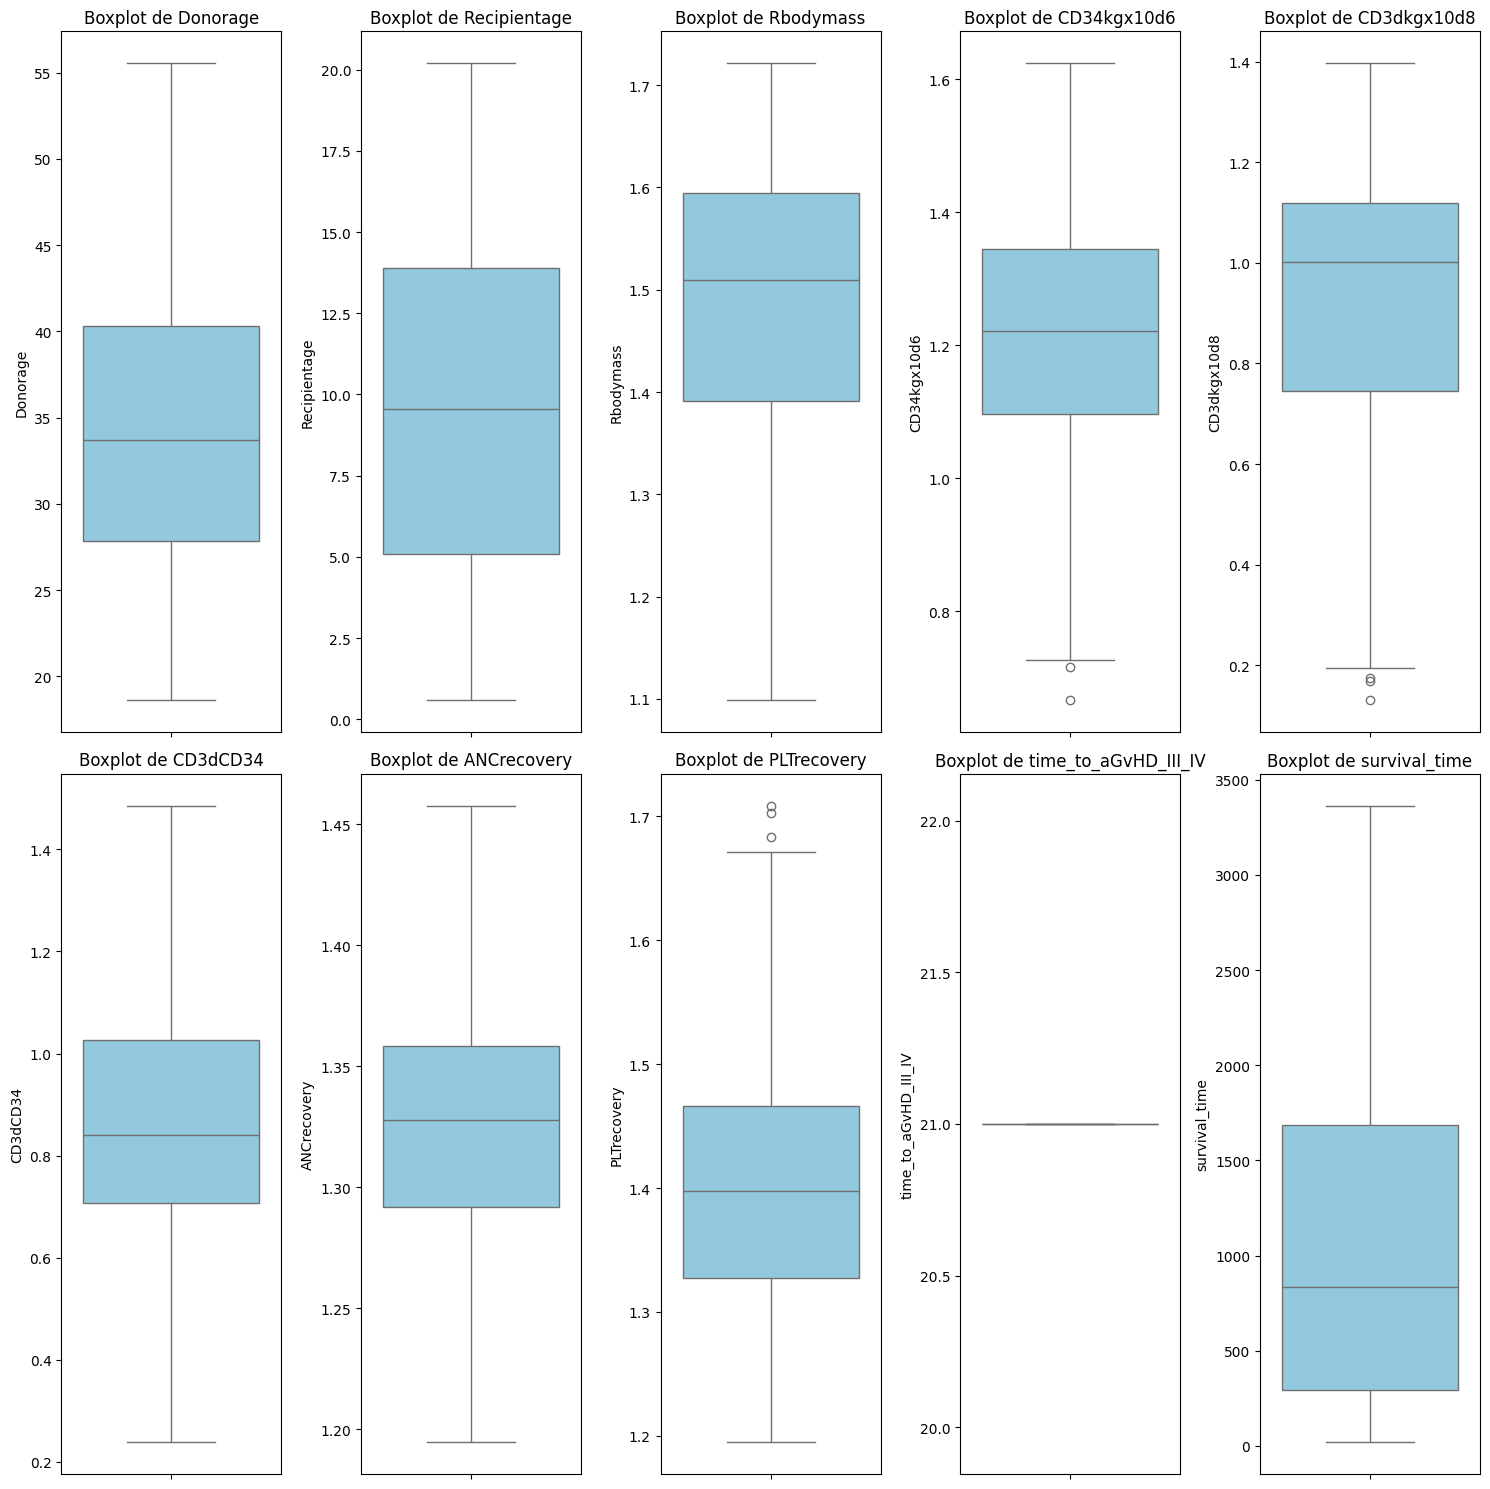

In [ ]:
# Función para reemplazar outliers con NaN utilizando el IQR
def replace_outliers_with_nan(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Reemplazar valores fuera del rango IQR con np.nan
    df[column] = df[column].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)

# Lista de columnas en las que queremos eliminar outliers
columns_to_clean = ['Rbodymass', 'CD34kgx10d6', 'CD3dkgx10d8', 'CD3dCD34', 'ANCrecovery', 'PLTrecovery', 'time_to_aGvHD_III_IV', 'survival_time']

# Reemplazamos outliers con NaN en las columnas seleccionadas
for col in columns_to_clean:
    replace_outliers_with_nan(bmtch_df_clean, col)

# Lista de las columnas numéricas seleccionadas
selected_columns = ['Donorage', 'Recipientage', 'Rbodymass', 'CD34kgx10d6', 'CD3dkgx10d8',
     'CD3dCD34', 'ANCrecovery', 'PLTrecovery', 'time_to_aGvHD_III_IV', 'survival_time']

# Definimos la cantidad de columnas y filas para los subplots
n_cols = 5  # Número de columnas en la matriz
n_rows = (len(selected_columns) + n_cols - 1) // n_cols  # Calcular filas necesarias

# Creamos subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Generamos los boxplots para cada variable numérica seleccionada
for i, col in enumerate(selected_columns):
    row = i // n_cols  # Fila del subplot
    col_num = i % n_cols  # Columna del subplot
    sns.boxplot(data=bmtch_df_clean, y=col, ax=axes[row, col_num], color="skyblue")
    axes[row, col_num].set_title(f'Boxplot de {col}')

# Eliminamos subplots vacíos si hay
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Ajustamos el espaciado entre los subplots
plt.tight_layout()
plt.show()

# **Variables Categóricas**

In [ ]:
# Lista de variables numéricas seleccionadas
selected_columns = ['Recipientgender', 'Stemcellsource', 'Donorage35', 'IIIV', 'Gendermatch', 'DonorABO',
                    'RecipientABO', 'RecipientRh', 'ABOmatch', 'DonorCMV', 'RecipientCMV', 'Disease', 'CMVstatus',
                    'Riskgroup', 'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'HLAgrI',
                    'Recipientage10', 'Recipientageint', 'Relapse', 'Antigen', 'Allele', 'aGvHDIIIIV', 'extcGvHD', 'survival_status']

# Aplicamos describe() solo a las variables numéricas en la lista
bmtch_df_clean[selected_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Recipientgender,166.0,0.590361,0.493255,0.0,0.0,1.0,1.0,1.0
Stemcellsource,166.0,0.795181,0.404791,0.0,1.0,1.0,1.0,1.0
Donorage35,166.0,0.451807,0.499178,0.0,0.0,0.0,1.0,1.0
IIIV,166.0,0.620482,0.486735,0.0,0.0,1.0,1.0,1.0
Gendermatch,166.0,0.186747,0.390887,0.0,0.0,0.0,0.0,1.0
DonorABO,166.0,0.409639,0.817033,-1.0,0.0,0.0,1.0,2.0
RecipientABO,166.0,0.295181,0.948799,-1.0,-1.0,0.0,1.0,2.0
RecipientRh,166.0,0.855422,0.352739,0.0,1.0,1.0,1.0,1.0
ABOmatch,166.0,0.716867,0.451883,0.0,0.0,1.0,1.0,1.0
DonorCMV,166.0,0.385542,0.488196,0.0,0.0,0.0,1.0,1.0


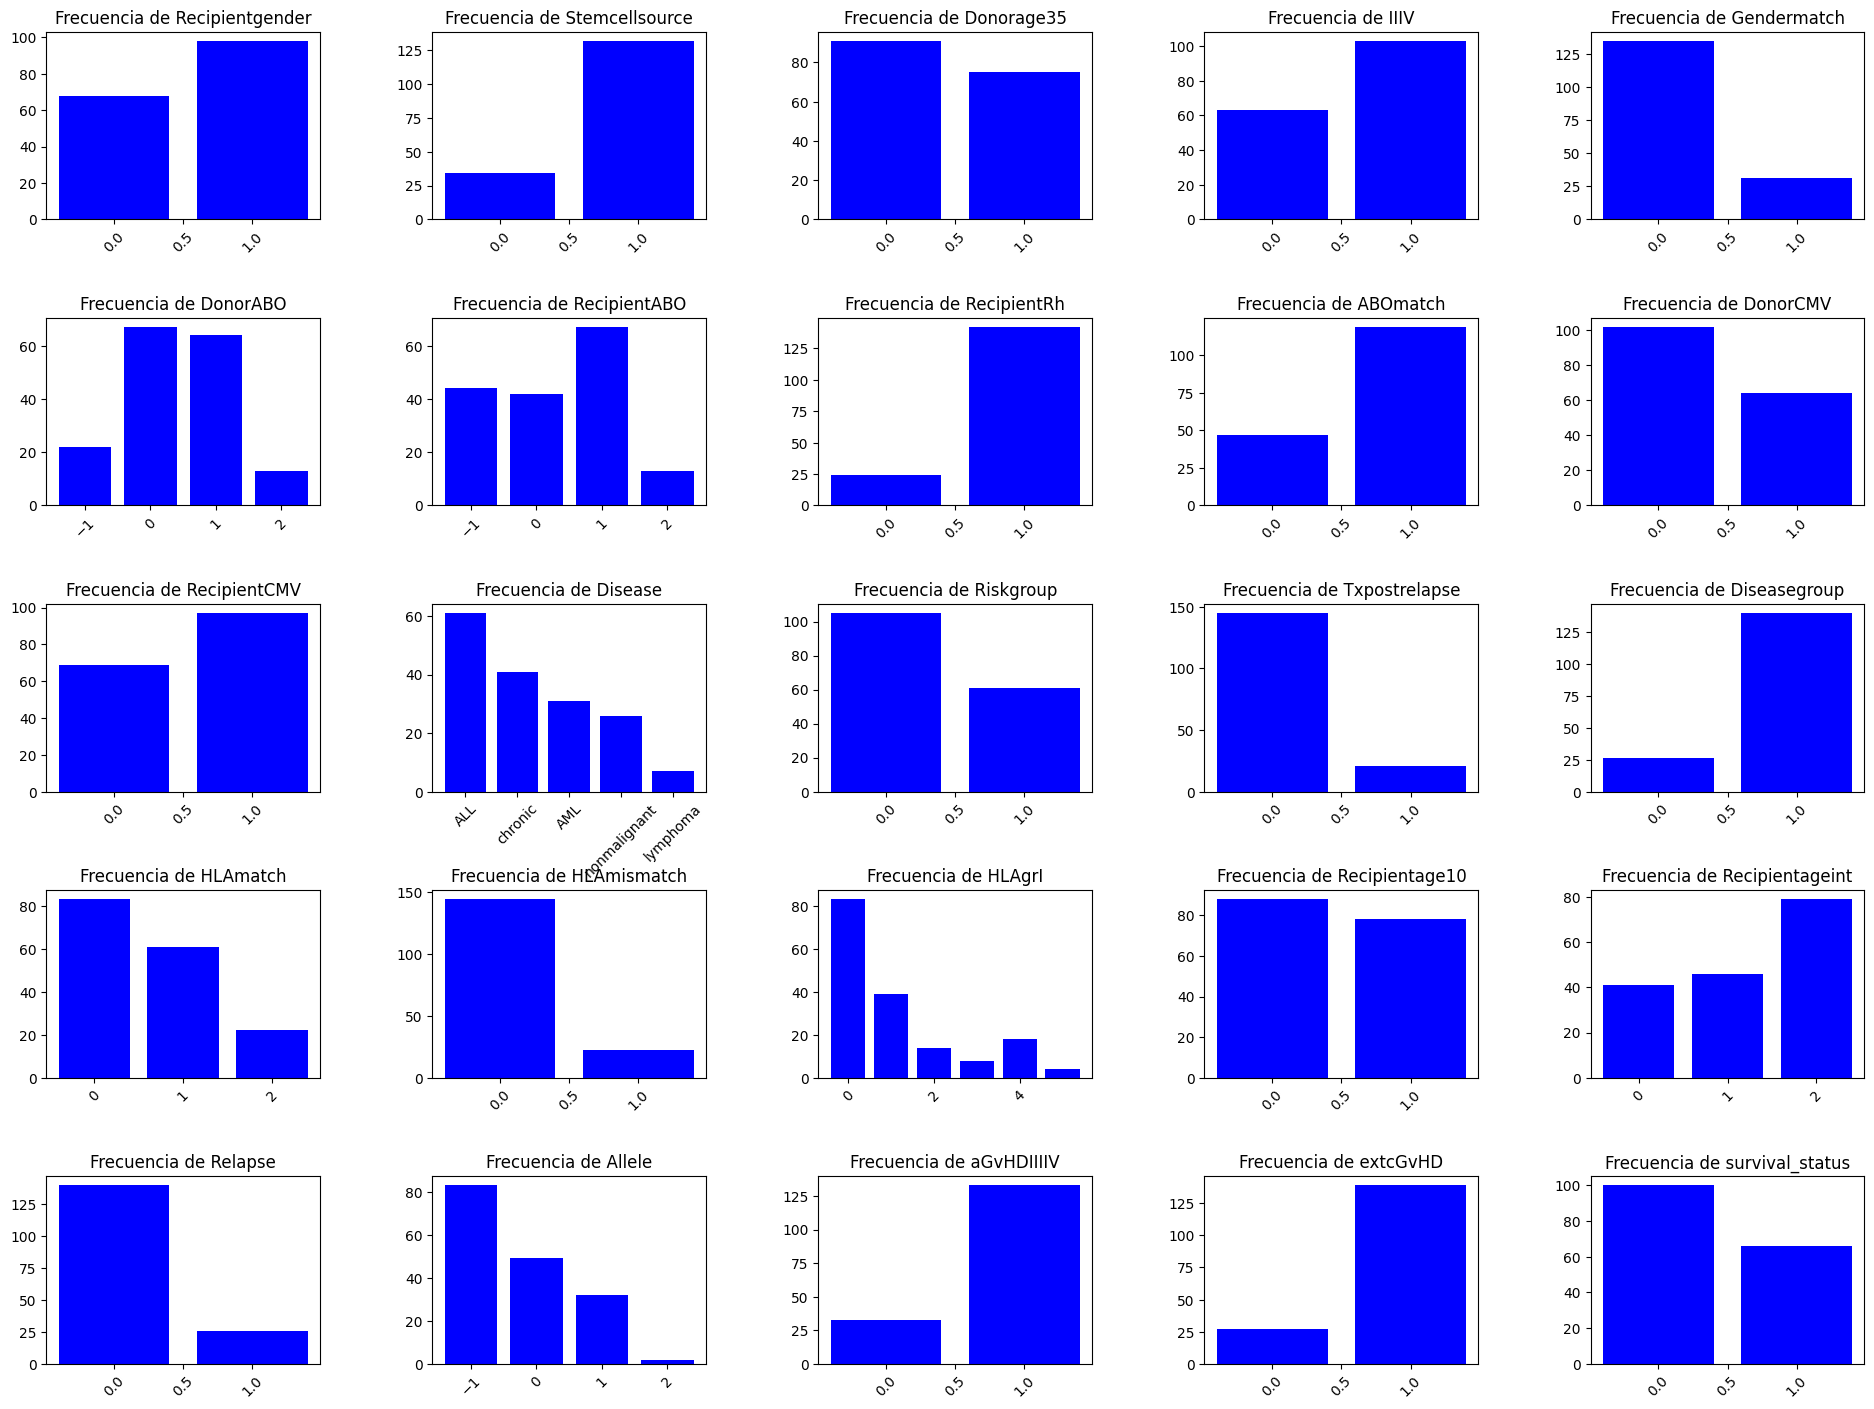

In [ ]:
# Lista de variables categóricas basadas en la imagen
categorical_columns = ['Recipientgender', 'Stemcellsource', 'Donorage35', 'IIIV', 'Gendermatch', 'DonorABO',
                    'RecipientABO', 'RecipientRh', 'ABOmatch', 'DonorCMV', 'RecipientCMV', 'Disease',
                    'Riskgroup', 'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'HLAgrI',
                    'Recipientage10', 'Recipientageint', 'Relapse', 'Allele', 'aGvHDIIIIV', 'extcGvHD', 'survival_status']

# Determinamos la cantidad de columnas y filas para los subplots (por ejemplo, 5x5)
n_cols = 5
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Redondear hacia arriba

# Creamos la figura y los ejes para los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
fig.tight_layout(pad=5.0)  # Espaciado entre los gráficos

# Generamos gráficos en subplots usando matplotlib
for i, col in enumerate(categorical_columns):
    row = i // n_cols  # Determinar la fila
    col_num = i % n_cols  # Determinar la columna

    # Obtenemos los valores de la columna y sus frecuencias
    values = bmtch_df_clean[col].value_counts()

    # Dibujamos el gráfico de barras
    axes[row, col_num].bar(values.index, values.values, color="blue")

    # Título del gráfico
    axes[row, col_num].set_title(f'Frecuencia de {col}')

    # Rotamos etiquetas del eje x si es necesario
    axes[row, col_num].tick_params(axis='x', rotation=45)

# Eliminamos subplots vacíos si no hay suficientes variables
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.show()

# **Análisis de correlación**

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = bmtch_df_clean[['Donorage', 'Recipientage', 'Rbodymass', 'CD34kgx10d6',
                                     'CD3dkgx10d8', 'CD3dCD34', 'ANCrecovery', 'PLTrecovery',
                                     'time_to_aGvHD_III_IV', 'survival_time']].corr()

# Filtrar la columna 'survival_time' para mostrar solo sus correlaciones con otras variables
survival_time_corr = correlation_matrix[['survival_time']]

# Mostrar las correlaciones de 'survival_time'
print(survival_time_corr)

                      survival_time
Donorage                  -0.019521
Recipientage              -0.103384
Rbodymass                 -0.107303
CD34kgx10d6                0.103050
CD3dkgx10d8               -0.033760
CD3dCD34                   0.068369
ANCrecovery                0.046998
PLTrecovery                0.003449
time_to_aGvHD_III_IV            NaN
survival_time              1.000000


In [ ]:
# Asegúrate de que estás seleccionando las columnas de manera correcta usando .loc o simplemente pasando una lista de las columnas
correlation_matrix = bmtch_df_clean[['DonorABO', 'RecipientABO','CMVstatus', 'Antigen', 'HLAmatch',
                                     'Allele', 'HLAgrI', 'Recipientageint', 'aGvHDIIIIV', 'survival_status']].corr()

# Filtrar la columna 'survival_status' para mostrar solo sus correlaciones con otras variables
survival_time_corr = correlation_matrix[['survival_status']]

# Mostrar las correlaciones de 'survival_status'
print(survival_time_corr)

                 survival_status
DonorABO                0.014565
RecipientABO            0.045779
CMVstatus               0.013461
Antigen                 0.056753
HLAmatch                0.056770
Allele                  0.070968
HLAgrI                  0.044223
Recipientageint         0.133663
aGvHDIIIIV             -0.088812
survival_status         1.000000
